# 통합 측정지표(Integration Metrics)

## 최단 경로(Shortest Path)

최단 경로: [0, 6, 4, 3, 1]


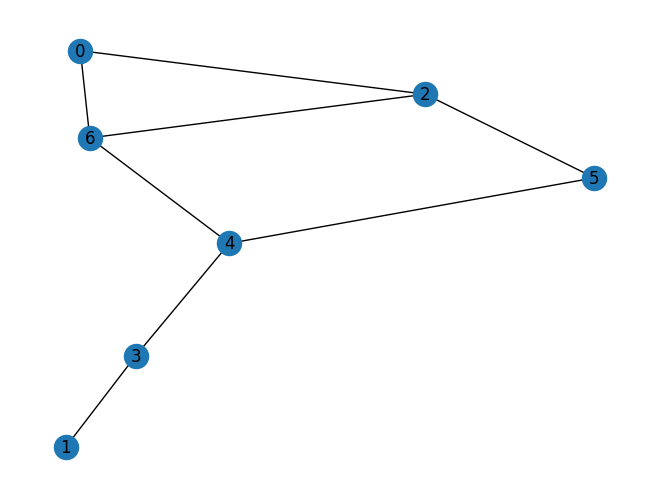

In [21]:
import networkx as nx


G = nx.Graph()
nodes = {0: "서울", 1: "부산", 2: "인천", 3: "대구", 4: "대전", 5: "광주", 6: "수원"}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(0, 2), (0, 6), (1, 3), (2, 5), (2, 6), (3, 4), (4, 5), (4, 6)])

shortest_path = nx.shortest_path(G, source=0, target=1)  # 0: 서울, 1: 부산
print(f"최단 경로: {shortest_path}")

nx.draw(G, with_labels=True)  # 그래프 시각화

## 특성 경로 길이(Characteristic Path Length)

In [22]:
print(f"특성 경로 길이: {nx.average_shortest_path_length(G)}")

특성 경로 길이: 2.0
